Rows after cleaning: 2049280


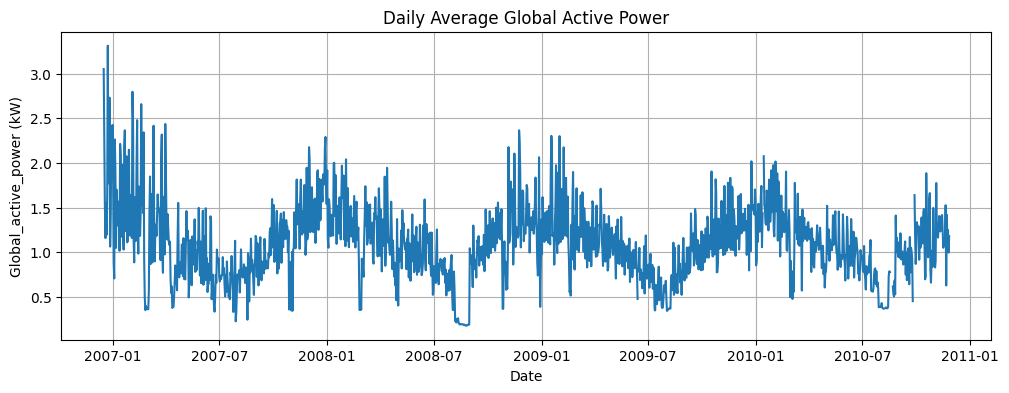

<Figure size 640x480 with 0 Axes>

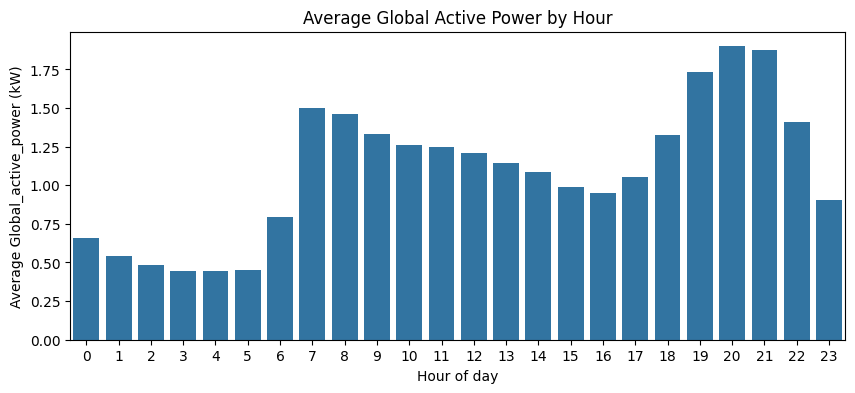

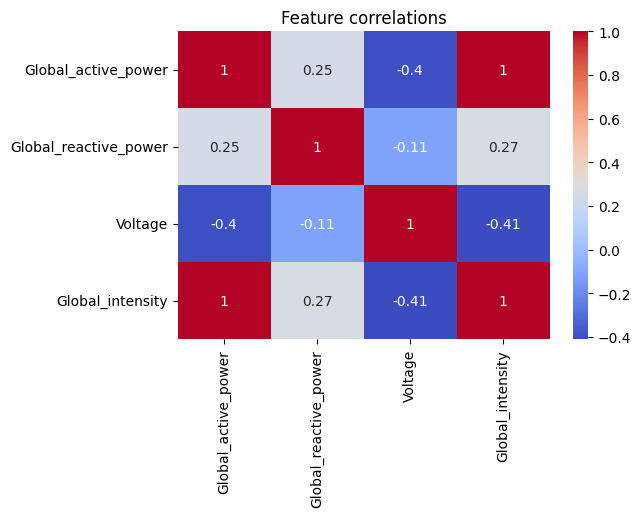

Saved: cleaned_energy.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/energy1.csv.txt', sep=';', low_memory=False)  # Kaggle file uses ';'
df.head()

# Replace '?' with NA and drop NA rows
df = df.replace('?', pd.NA).dropna()
# Convert types
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DateTime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'])
df = df.set_index('DateTime')
print("Rows after cleaning:", len(df))


daily = df['Global_active_power'].resample('D').mean()
plt.figure(figsize=(12,4))
plt.plot(daily.index, daily.values)
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global_active_power (kW)')
plt.grid(True)
plt.show()
plt.savefig('daily_trend.png', bbox_inches='tight')


df['hour'] = df.index.hour
hourly = df.groupby('hour')['Global_active_power'].mean()
plt.figure(figsize=(10,4))
sns.barplot(x=hourly.index, y=hourly.values)
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour of day')
plt.ylabel('Average Global_active_power (kW)')
plt.show()


plt.figure(figsize=(6,4))
sns.heatmap(df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature correlations')
plt.show()

df.reset_index().to_csv('cleaned_energy.csv', index=False)
print("Saved: cleaned_energy.csv")